# **Learning**

In [1]:
TRAINING_SET_FEATURES = "../01_data/train/under_educated_features.csv"
TRAINING_SET_LABELS = "../01_data/train/under_educated_labels.csv"

MODEL_NAME = "under_educated"

In [2]:
import pandas as pd
import numpy as np

from tensorflow import keras
import tensorflow as tf

/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/madbiker/miniconda3/envs/xai/lib/python3

## **Loading training dataset**

In [3]:
X = np.loadtxt(TRAINING_SET_FEATURES, delimiter=",")
X = np.vstack([X, np.loadtxt("../01_data/train/college_educated_features.csv", delimiter=",")])
y = np.loadtxt(TRAINING_SET_LABELS, delimiter=",")
y_p = np.loadtxt("../01_data/train/college_educated_labels.csv", delimiter=",")
y = np.concatenate([y, y_p])

## **Training a neural network**

In [4]:
import neural_network
from importlib import reload
reload(neural_network)

model = neural_network.create_model(X)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
opt = keras.optimizers.Adam(learning_rate=0.0025)
model.compile(optimizer=opt, loss="categorical_crossentropy")
history = model.fit(X, y, validation_split=0.1, epochs=100, batch_size=2000)

Train on 28212 samples, validate on 3135 samples
Epoch 1/100
28212/28212 [==============================] - 2s 62us/sample - loss: 1.0419 - val_loss: 1.0548
Epoch 2/100
28212/28212 [==============================] - 1s 21us/sample - loss: 0.9499 - val_loss: 0.8940
Epoch 3/100
28212/28212 [==============================] - 1s 20us/sample - loss: 0.8515 - val_loss: 0.8371
Epoch 4/100
28212/28212 [==============================] - 1s 20us/sample - loss: 0.8186 - val_loss: 0.8186
Epoch 5/100
28212/28212 [==============================] - 1s 19us/sample - loss: 0.8039 - val_loss: 0.7972
Epoch 6/100
28212/28212 [==============================] - 1s 19us/sample - loss: 0.7971 - val_loss: 0.8043
Epoch 7/100
28212/28212 [==============================] - 1s 19us/sample - loss: 0.7906 - val_loss: 0.7887
Epoch 8/100
28212/28212 [==============================] - 1s 19us/sample - loss: 0.7875 - val_loss: 0.7838
Epoch 9/100
28212/28212 [==============================] - 1s 19us/sample - loss: 0.785

In [6]:
import matplotlib.pyplot as plt

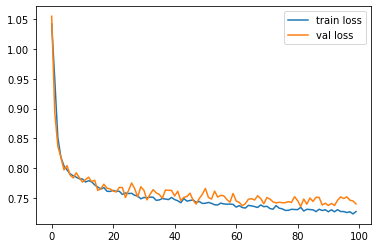

In [7]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()

## **Saving the model**

In [8]:
model.save_weights("../03_models/"+MODEL_NAME+"/")